
# Bibliotecas 

In [2]:
import tensorflow as tf
from numpy.random import RandomState
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import manifold, datasets
from matplotlib import ticker

In [29]:

## carrega a base de dados do MNIST
#mnist = tf.keras.datasets.mnist.load_data()
#fmnist = tf.keras.datasets.fashion_mnist.load_data()
cifar10 = tf.keras.datasets.cifar10.load_data()

## extrai as imagens e rótulos da base de treinamento
#(train_images, train_labels), _ = mnist
(train_images, train_labels), _ = cifar10


# cria uma lista para armazenar as imagens e rótulos dos dígitos 0 e 3
images = []
labels = []

n_samples = 200 #temos 200 amostras
rng = RandomState(0)

def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

#função que plota um gráfico 2d
def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


# percorre todas as imagens e rótulos da base de treinamento
for i in range(train_images.shape[0]):
    # verifica se o rótulo é 0 ou 3
    if train_labels[i] == 0 or train_labels[i] == 3:
        # adiciona a imagem e rótulo à lista
        images.append(train_images[i])
        labels.append(train_labels[i])
    # para o loop se já foram coletadas 200 amostras de imagens
    if len(images) == 200:
        break

# converte as listas em arrays numpy
images = np.array(images)
labels = np.array(labels)

# imprime o número de amostras de imagens e seus rótulos
print("Número de amostras de imagens: {}".format(images.shape[0]))
print("Rótulos: {}".format(np.unique(labels)))


# Precisamos converter o vetor de imagens em um um vetor de pontos 
images_vetor = images.reshape(images.shape[0], -1)

170498071/170498071 [==============================] - 1699s 10us/step
Número de amostras de imagens: 200
Rótulos: [0 3]


## PCA

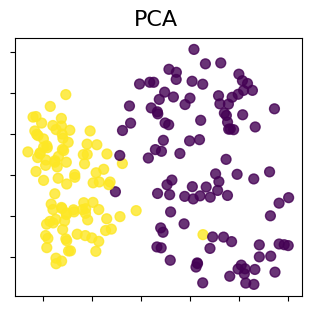

In [27]:
# técnica PCA para redução de dimensionalidade

# Precisamos converter o vetor de imagens em um um vetor de pontos 
images_vetor = images.reshape(images.shape[0], -1)

pca = PCA(n_components=2)
Y_pca = pca.fit_transform(images_vetor)
S_color = labels;

plot_2d(Y_pca, S_color, "PCA")


## MDS

c:\Users\plini\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


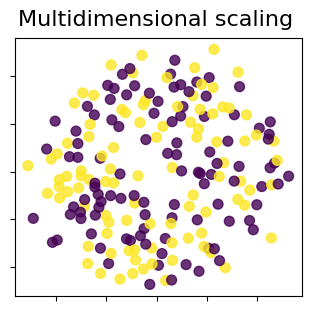

In [31]:
# técnica MDS para redução de dimensionalidade

md_scaling = manifold.MDS(
    n_components=2, max_iter=50, n_init=4, random_state=rng
)

S_scaling = md_scaling.fit_transform(images_vetor)

plot_2d(S_scaling, labels, "Multidimensional scaling")